<a href="https://colab.research.google.com/github/Sasi3011/AIML/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay

import matplotlib.pyplot as plt

# Load data
data_path = "dt_data.csv"
df = pd.read_csv(data_path)

print("Shape:", df.shape)
df.head()

Shape: (800, 13)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,target
0,3.231818,3.342242,3.170904,-1.143316,1.118764,-0.461158,1.350986,-4.232194,-1.952545,1.530323,1.783189,0.429053,0
1,-2.001479,-2.055830,-1.088576,2.311383,2.210255,-0.632016,0.213387,0.132520,-1.839323,-1.319074,2.762408,-0.625631,1
2,3.195935,1.768784,2.937066,-2.571942,1.367319,0.878246,3.710392,2.330900,2.686562,-0.269503,-2.464667,-0.173651,0
3,1.499780,-2.983864,-0.606378,-0.787348,-1.084954,1.572479,0.888036,0.494976,1.643795,-2.872902,-0.587353,-1.758593,0
4,1.338514,-0.559925,1.093819,-2.132901,0.932437,0.971042,2.602676,1.660926,0.264757,-2.086844,-0.819115,0.269144,0


In [2]:
# Basic EDA
print(df.describe().T)
print("\nClass distribution:\n", df['target'].value_counts(normalize=True).rename('proportion'))


        count      mean       std        min       25%       50%       75%  \
f1      800.0  0.063440  2.169906  -6.795297 -1.418810  0.273335  1.671035   
f2      800.0 -0.003246  2.183722  -6.655978 -1.574302 -0.053776  1.529525   
f3      800.0  0.643789  1.880851  -4.332311 -0.626606  0.653578  1.964293   
f4      800.0 -0.762459  1.833508  -5.443321 -1.970739 -0.776120  0.385978   
f5      800.0 -0.029156  1.941277  -6.889304 -1.354848  0.084058  1.269699   
f6      800.0 -0.035964  0.990049  -2.467159 -0.728794 -0.084972  0.650251   
f7      800.0  0.099234  2.136929  -6.367211 -1.184647  0.366256  1.526186   
f8      800.0  0.442011  3.344602 -10.637364 -1.561974  0.327103  2.349404   
f9      800.0  0.706821  1.952545  -4.463133 -0.644132  0.752426  1.971816   
f10     800.0  1.463012  4.109045 -10.039857 -1.602128  1.360284  4.333170   
f11     800.0  0.505858  1.827922  -4.277233 -0.820524  0.531990  1.817336   
f12     800.0  0.011642  0.993152  -2.985309 -0.636568  0.019712

In [3]:
# Train/Validation split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

X_train.shape, X_val.shape

((640, 12), (160, 12))

In [4]:
# Train/Validation split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

X_train.shape, X_val.shape

((640, 12), (160, 12))

In [5]:
# Decision Tree (no scaling needed)
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    random_state=123
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
# DecisionTreeClassifier supports predict_proba
y_proba = clf.predict_proba(X_val)[:, 1]

Accuracy : 0.844
Precision: 0.841
Recall   : 0.806
F1-score : 0.823
ROC AUC  : 0.866

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86        88
           1       0.84      0.81      0.82        72

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160


Confusion Matrix:
 [[77 11]
 [14 58]]


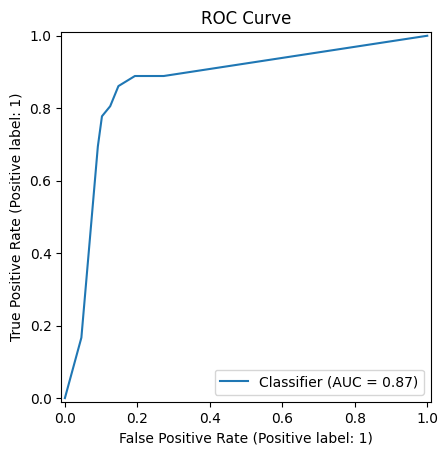

In [7]:
# Evaluation
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve (uses matplotlib; no style or color specified)
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()


In [8]:
# Basic EDA
print(df.describe().T)
print("\nClass distribution:\n", df['target'].value_counts(normalize=True).rename('proportion'))


        count      mean       std        min       25%       50%       75%  \
f1      800.0  0.063440  2.169906  -6.795297 -1.418810  0.273335  1.671035   
f2      800.0 -0.003246  2.183722  -6.655978 -1.574302 -0.053776  1.529525   
f3      800.0  0.643789  1.880851  -4.332311 -0.626606  0.653578  1.964293   
f4      800.0 -0.762459  1.833508  -5.443321 -1.970739 -0.776120  0.385978   
f5      800.0 -0.029156  1.941277  -6.889304 -1.354848  0.084058  1.269699   
f6      800.0 -0.035964  0.990049  -2.467159 -0.728794 -0.084972  0.650251   
f7      800.0  0.099234  2.136929  -6.367211 -1.184647  0.366256  1.526186   
f8      800.0  0.442011  3.344602 -10.637364 -1.561974  0.327103  2.349404   
f9      800.0  0.706821  1.952545  -4.463133 -0.644132  0.752426  1.971816   
f10     800.0  1.463012  4.109045 -10.039857 -1.602128  1.360284  4.333170   
f11     800.0  0.505858  1.827922  -4.277233 -0.820524  0.531990  1.817336   
f12     800.0  0.011642  0.993152  -2.985309 -0.636568  0.019712

In [9]:
# Train/Validation split
X = df.drop(columns=['target'])
y = df['target']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

X_train.shape, X_val.shape



((640, 12), (160, 12))

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=7))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
y_proba = pipe.predict_proba(X_val)[:, 1]


Accuracy : 0.944
Precision: 0.944
Recall   : 0.931
F1-score : 0.937
ROC AUC  : 0.982

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        88
           1       0.94      0.93      0.94        72

    accuracy                           0.94       160
   macro avg       0.94      0.94      0.94       160
weighted avg       0.94      0.94      0.94       160


Confusion Matrix:
 [[84  4]
 [ 5 67]]


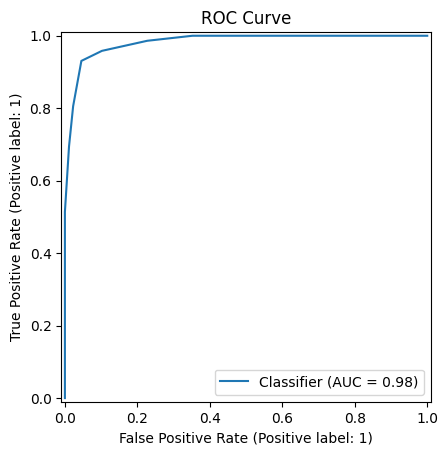

In [11]:
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_proba)

print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC AUC  : {auc:.3f}")

print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
print("\nConfusion Matrix:\n", cm)

# ROC Curve (uses matplotlib; no style or color specified)
RocCurveDisplay.from_predictions(y_val, y_proba)
plt.title("ROC Curve")
plt.show()
